# Model Training
## Guide

In [1]:
guide_used = "https://www.kaggle.com/code/mbalvi75/12-maximum-margin-classifier"

## Make necessary imports

In [26]:
#import libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Importing data

### Import data

In [5]:
od.download("https://www.kaggle.com/datasets/arshid/iris-flower-dataset")   # Got error, so I downloaded it manually

Skipping, found downloaded files in ".\iris-flower-dataset" (use force=True to force download)


### Read data

In [6]:
file = 'iris-flower-dataset/IRIS.csv'
iris = pd.read_csv(file)

iris.columns = ['sl', 'sw', 'pl', 'pw', 'variety']
iris.head(2)

# Set the features
# x = iris.iloc[:, [0, 1, 2, 3]].values

,sl,sw,pl,pw,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


## Visualization

Vertical scatter plot:

(0.0, 9.0)

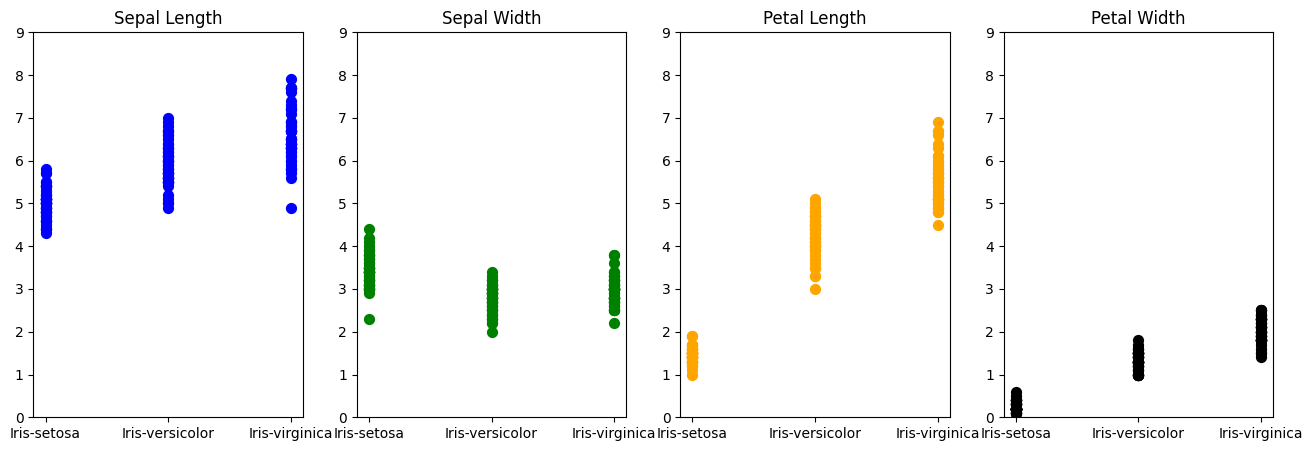

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.scatter(iris.variety, iris.sl, c='blue', s=50)
plt.title('Sepal Length')
plt.ylim(0,9)

plt.subplot(1,4,2)
plt.scatter(iris.variety, iris.sw, c='green', s=50)
plt.title('Sepal Width')
plt.ylim(0,9)

plt.subplot(1,4,3)
plt.scatter(iris.variety, iris.pl, c='orange', s=50)
plt.title('Petal Length')
plt.ylim(0,9)

plt.subplot(1,4,4)
plt.scatter(iris.variety, iris.pw, c='black', s=50)
plt.title('Petal Width')
plt.ylim(0,9)

## Data Prepocessing

Define X:

In [17]:
X = iris[['sl', 'sw', 'pl', 'pw']]
X

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Define y:

In [16]:
y = iris['variety']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: variety, Length: 150, dtype: object

Make train and test data:

In [18]:
xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(xtr.shape)
print(xte.shape)
print(ytr.shape)
print(yte.shape)

(120, 4)
(30, 4)
(120,)
(30,)


Define the model:

In [22]:
svc_model = SVC(kernel='linear')

Train the model:

In [23]:
svc_model.fit(xtr, ytr)

SVC(kernel='linear')

Make predictions:

In [25]:
predictions = svc_model.predict(xte)
print(confusion_matrix(yte, predictions))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [27]:
print(classification_report(yte, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

